In [1]:
import os 
import numpy as np

from ivim_analysis.read_config import get_config
from ivim_analysis.n_patients import NPatients
from ivim_analysis.load_b_example import load_b

Welcome to ivim_analysis version 1.0.0


# Parameter initialization

In [2]:
from datetime import date
patients_info_file, zhaog_path, pickle_ivim_output_path = get_config('../config/config.json')

# 创建输出目录
output_dir = f"../output/{date.today()}"
pickle_ivim_output_path = f"{output_dir}/pickled/ivim"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(pickle_ivim_output_path, exist_ok=True)

n_analysis = NPatients.readPatientsInfo(patients_info_file, zhaog_path)

In [3]:
# bvals, bvecs = load_b()

# # TODO: temporary solution to test the code
# dir_bvals = [bvals]
# dir_bvals.append(np.insert(bvals, 0, 10))
# dir_bvals.append(np.insert(bvals, 0, 10))
# dir_bvals.append(bvals)

# list_bvecs = [bvecs]
# list_bvecs.append(np.insert(bvecs, 0, bvecs[0], axis=0))
# list_bvecs.append(np.insert(bvecs, 0, bvecs[0], axis=0))
# list_bvecs.append(bvecs)

# print(dir_bvals)

# print(bvecs)


In [4]:
import numpy as np
dir_bvals = {}
b_val_path = os.path.join(zhaog_path, 'patient.bval')
with open(b_val_path, 'r') as f:    
    b_val = f.read().split('\n')
    # remove the last empty line
    b_val = b_val[:-1]
    num_patients = len(b_val)
    print("# of patients: ", num_patients)
    for i in range(num_patients):
        # tmp_b_val = [int(i) for i in b_val[0] if i.isdigit()]  # Filter out non-numeric values
        i_name_bval = b_val[i].split()
        i_name = i_name_bval[0]
        i_b_val = [int(i) for i in i_name_bval if i.isdigit()]  # Filter out non-numeric values
        dir_bvals[i_name] = i_b_val
        print(i, b_val[i])
        print(i_b_val)
    print(dir_bvals)

bvecs = [0, 0, 1]

# of patients:  7
0 刘伯林 20 50 80 150 200 500 800 1000 1500 0
[20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0]
1 刘军 25 50 100 200 300 400 600 800 900 1000 0
[25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
2 孙金鹿 25 50 100 200 300 400 600 800 900 1000 0
[25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
3 张喜凤 20 50 80 150 200 500 800 1000 1500 0
[20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0]
4 徐家恒 25 50 100 200 300 400 600 800 900 1000 0
[25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
5 董维龙 25 50 100 200 300 400 600 800 900 1000 0
[25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
6 霍东杙 25 50 100 200 300 400 600 800 900 1000 0
[25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
{'刘伯林': [20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0], '刘军': [25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0], '孙金鹿': [25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0], '张喜凤': [20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0], '徐家恒': [25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0], '董维龙':

In [5]:
# print info
for n in n_analysis:
    print(n_analysis[n].nii_path, n_analysis[n].patient_id)

/data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/刘伯林_10.nii.gz 刘伯林
/data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/刘军_11.nii.gz 刘军
/data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/孙金鹿_11.nii.gz 孙金鹿
/data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/张喜凤_10.nii.gz 张喜凤
/data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/徐家恒_11.nii.gz 徐家恒
/data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/董维龙_11.nii.gz 董维龙
/data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/霍东杙_11.nii.gz 霍东杙


# Plot

## Plot pancreas

### Plot with roi

No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles


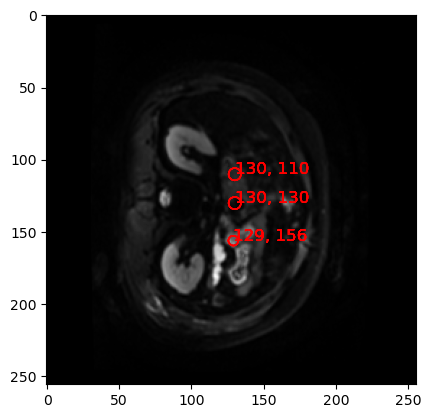

In [6]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
for name, analysis in n_analysis.items():
    analysis.plot_pancreas_slice(ax, plot_roi=True)

In [7]:
# import matplotlib.pyplot as plt
# _, ax = plt.subplots(len(n_analysis), 1, figsize=(10, 10*len(n_analysis)))
# for analysis in enumerate(n_analysis):
#     analysis.plot_pancreas_slice(ax, plot_roi=True)

No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles
No circles found. Using default circles


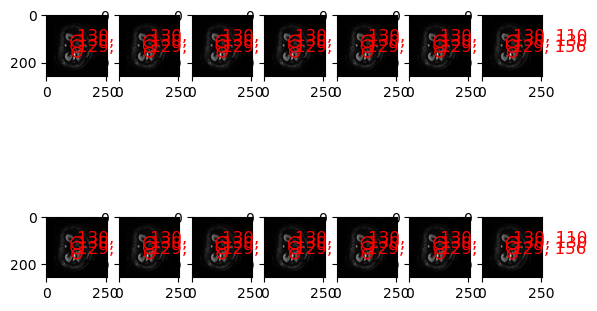

In [8]:
import matplotlib.pyplot as plt

fig_t2, axes_t2 = plt.subplots(2, len(n_analysis))
for i, analysis in enumerate(n_analysis):
    n_analysis[n].plot_pancreas_slice(axes_t2[0, i], plot_roi=True)
    n_analysis[n].plot_pancreas_slice(axes_t2[1, i], plot_roi=True)

plt.savefig('../output/teacher_tmp.png')

In [9]:
# all_circles ={
#     1: [ (130, 180, 5), (130, 130, 5), (130, 110, 5) ],
#     2: [ (128, 190, 5), (145, 173, 4), (155, 150, 5) ],
#     3: [ (30, 180, 5), (130, 130, 5), (130, 110, 5) ],
#     4: [ (130, 200, 5), (130, 130, 5), (130, 110, 5) ],
# }
# n_analysis[0].circles = all_circles[1]
# n_analysis[1].circles = all_circles[2]
# n_analysis[2].circles = all_circles[3]
# n_analysis[3].circles = all_circles[4]
# analysis.plot_mask_roi()

In [10]:
import json
with open("../config/circles.json", "r") as f:
    circ = json.load(f)
    print(circ)

{'刘伯林': [[130, 180, 5], [130, 130, 5], [130, 110, 5]], '刘军 ': [], '孙金鹿': [], '张喜凤': [], '徐家恒': [], '董维龙': [], '霍东杙': []}


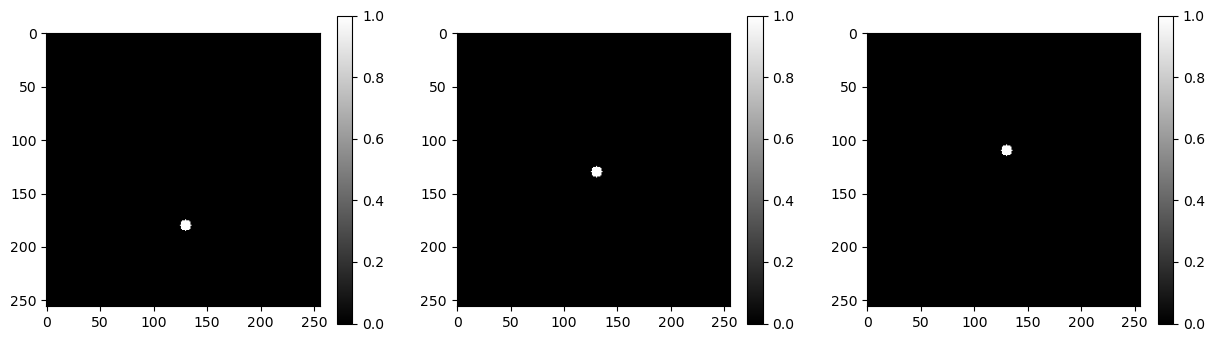

-------------------


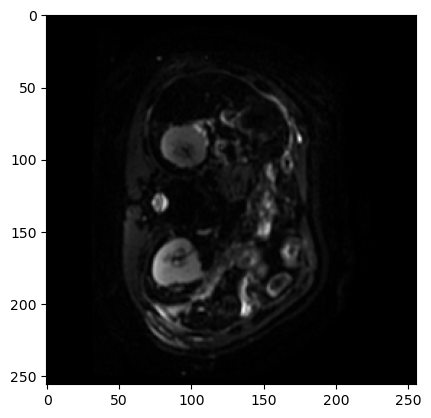

-------------------
No circles found. Using default circles


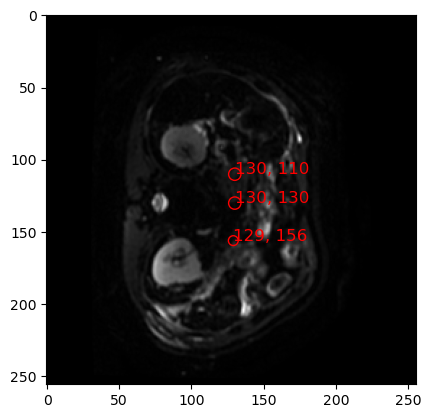

-------------------
10
[-0.00054329] 4.787138921717199


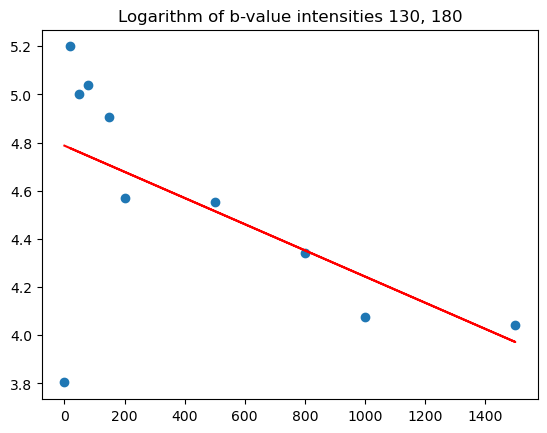

-------------------


In [11]:
tmp = "刘伯林"
tmp_a = n_analysis[tmp]
tmp_a.circles = circ[tmp]
tmp_a.bvals = dir_bvals[tmp]

# plot
tmp_a.plot_mask_roi()
plt.show()
print("-------------------")

# plot
_, ax = plt.subplots()
tmp_a.plot_pancreas_slice(ax)
plt.show()
print("-------------------")

# plot
_, ax = plt.subplots()
tmp_a.plot_pancreas_slice(ax, plot_roi=True)
plt.show()
print("-------------------")

# plot
tmp_a.plot_log_b()
plt.show()
print("-------------------")

In [12]:
# n_analysis[0].circles = all_circles[1]
# n_analysis[1].circles = all_circles[2]
# n_analysis[2].circles = all_circles[3]
# n_analysis[3].circles = all_circles[4]


for analysis in n_analysis:
    image_path = os.path.join(output_dir, analysis.patient_id)
    os.makedirs(image_path, exist_ok=True)

    # analysis.plot_b_intensities()
    # image_path = os.path.join(image_path, "ivim_params.png")
    # plt.savefig("../output/b_intensities.png")
    # plt.show()
    analysis.plot_log_b()
    image_path = os.path.join(image_path, "log_b.png")
    plt.savefig(image_path)
    plt.close()

AttributeError: 'str' object has no attribute 'patient_id'

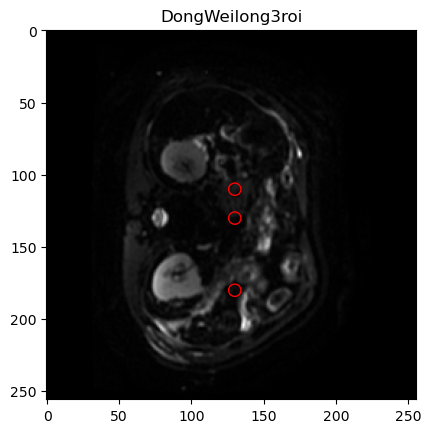

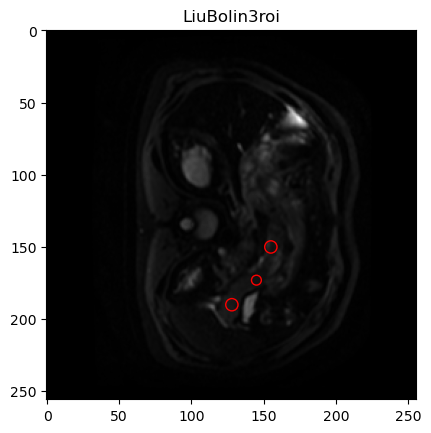

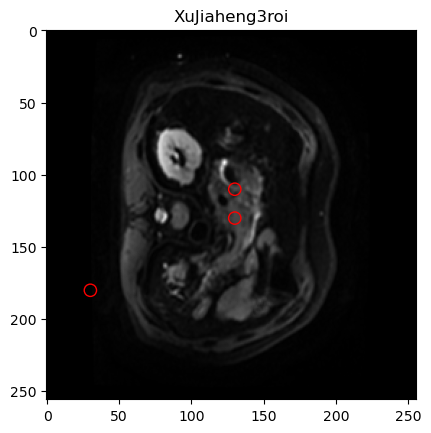

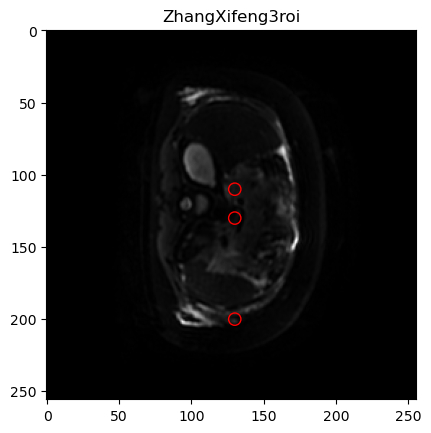

In [ ]:

import matplotlib.pyplot as plt
for circles, analysis in zip(all_circles.items(), n_analysis):
        _, ax = plt.subplots()
        analysis.plot_pancreas_slice(ax, plot_roi=True, circles=circles[1])
        ax.set_title(analysis.patient_id + '3roi')
        image_path = os.path.join(output_dir, analysis.patient_id)
        image_path = os.path.join(image_path, "pancreas_slice_with_3roi.png")
        plt.savefig(image_path)
        


# Run analysis

In [ ]:
for i, analysis in enumerate(n_analysis):
    pickle_ivim_path = os.path.join(pickle_ivim_output_path, 'ivim_maps'+analysis.patient_id+'.pkl')
    analysis.run_analysis(bvals=dir_bvals[analysis.patient_id], bvecs=[bvecs]*analysis.num_bvals, 
                           load_from_pickle=True, 
                           pickle_ivim_path=pickle_ivim_path,
                           save_ivim_params=True,
                           is_plot=False)

/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


Loading data from pickle file
Pickle file not found. Running the analysis.


  0%|          | 0/65536 [00:00<?, ?it/s]/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:381: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals >=
/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:376: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals <=
/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:434: UserWarning: x0 obtained from linear fitting is not feasible as initial guess for leastsq while estimating f and D_star. Using parameters from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:507: UserWarning: x0 is unfeasible for leastsq fitting. Returning x0 values from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:344: UserWarning: Bounds are viol

Loading data from pickle file
Pickle file not found. Running the analysis.


 38%|███▊      | 24869/65536 [01:23<02:50, 238.81it/s]

KeyboardInterrupt: 

 38%|███▊      | 24898/65536 [01:35<02:50, 238.81it/s]

## Plot the IVIM parameters

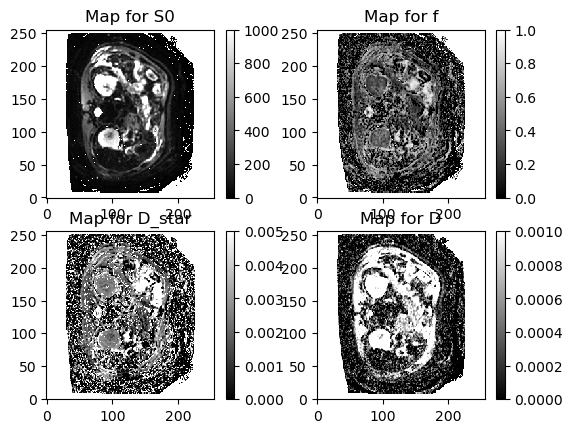

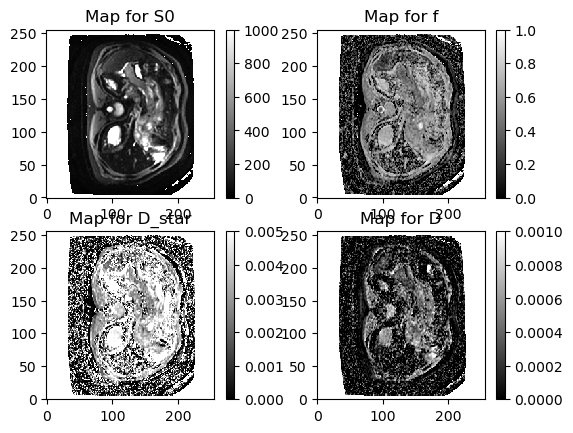

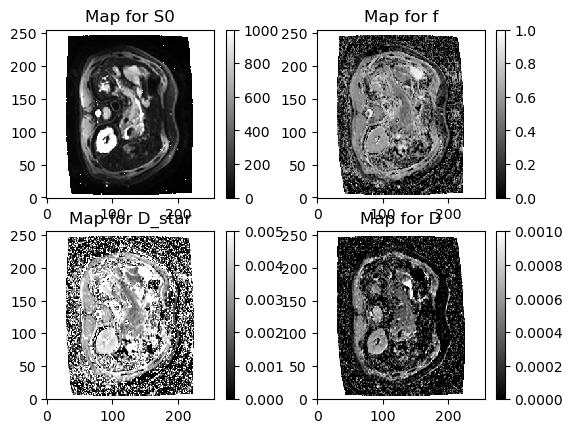

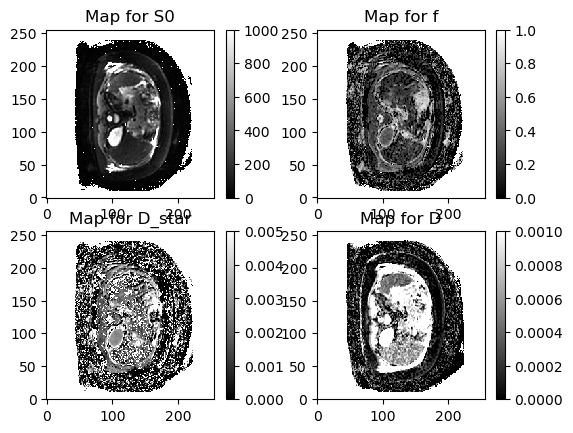

In [8]:
list_fig_ivim = {}
for analysis in n_analysis:
    list_fig_ivim[analysis.patient_id] = analysis.plot_ivim()

# Save fig and pptx

In [9]:
import os
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# 保存图片
for i, fig in list_fig_ivim.items():
    image_path = os.path.join(output_dir, i)
    os.makedirs(image_path, exist_ok=True)
    image_path = os.path.join(image_path, "ivim_params.png")
    fig.savefig(image_path)


In [13]:
def add_pic_to_slice(prs, image_path, text=""):
        # 添加幻灯片
        slide_layout = prs.slide_layouts[5]  # 使用空白幻灯片布局
        slide = prs.slides.add_slide(slide_layout)

        # 添加图片到幻灯片
        left = Inches(1)
        top = Inches(1)
        height = Inches(5.5)
        # add text to slide
        slide.shapes.placeholders[0].text = text
        slide.shapes.add_picture(image_path, left, top, height=height)

# 创建 PowerPoint 演示文稿
def generate_pptx():
    prs = Presentation()

    add_pic_to_slice(prs, '../output/teacher_tmp.png', text="T2 and ADC")

    for i, fig in list_fig_ivim.items():
        # 添加幻灯片
        slide_layout = prs.slide_layouts[5]  # 使用空白幻灯片布局
        slide = prs.slides.add_slide(slide_layout)

        # 添加图片到幻灯片
        image_path = os.path.join(output_dir,i, "ivim_params.png")
        left = Inches(1)
        top = Inches(1)
        height = Inches(5.5)

        # add text to slide
        slide.shapes.placeholders[0].text = i
        
        slide.shapes.add_picture(image_path, left, top, height=height)

        # use func
        log_b_path = os.path.join(output_dir, i, "log_b.png")
        add_pic_to_slice(prs, log_b_path, text=i)
        
        pancreas_slice_path = os.path.join(output_dir, i, "pancreas_slice_with_3roi.png")
        add_pic_to_slice(prs, pancreas_slice_path, text=i)

    # 保存 PowerPoint 文件
    pptx_path = os.path.join(output_dir, "presentation.pptx")
    prs.save(pptx_path)

    print(f"PowerPoint 文件已保存到: {pptx_path}")

generate_pptx()


PowerPoint 文件已保存到: ../output/2024-09-18/presentation.pptx


# Print para

In [14]:
for analysis in n_analysis:
    analysis.print_estimated_params_roi(save_ivim_params=True)

DongWeilong estimated parameter:
head:
S0: 169.79979734876397
f: 0.40019471013147795
D_star: 0.015612251129707749
D: 0.0004474959745044559
body:
S0: 225.47171708091707
f: 0.42546745422588556
D_star: 0.01522746793387795
D: 0.0005753941123385066
tail:
S0: 346.11070370043046
f: 0.1702441046676233
D_star: 0.040135755198151386
D: 0.0007763846106985733
LiuBolin estimated parameter:
head:
S0: 507.3129798357452
f: 0.3972436312788559
D_star: 0.003301277053685117
D: 0.00038771533774691535
body:
S0: 349.59893404699864
f: 0.42173899306932344
D_star: 0.002942926255478699
D: 0.0002762931788506055
tail:
S0: 460.7285611598114
f: 0.44935528220806215
D_star: 0.002689743808007078
D: 0.0003850264980449664
XuJiaheng estimated parameter:
head:
S0: 14.032655637043142
f: 0.019561627969900085
D_star: 0.014672211779158313
D: -4.186030378729491e-05
body:
S0: 661.9277303659726
f: 0.4238922091237014
D_star: 0.002357776970230984
D: 0.00034863243384438124
tail:
S0: 578.8936463483061
f: 0.4824873894716375
D_star: 0.0

10


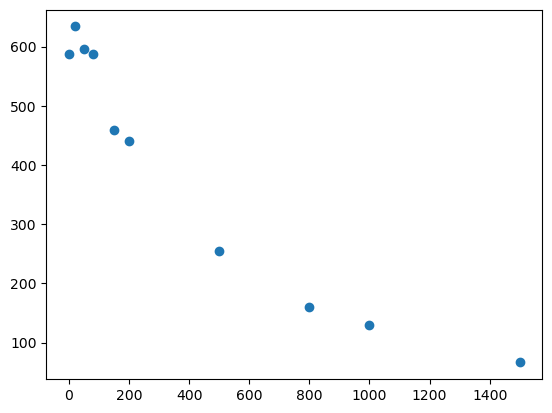

10
[-0.00157816] 5.800005687054232


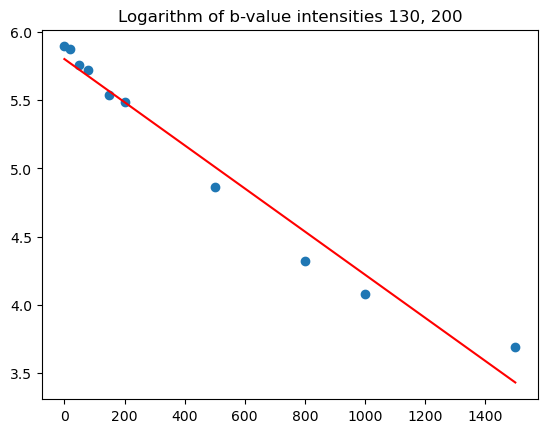

In [15]:
analysis.plot_b_intensities()
plt.savefig("../output/b_intensities.png")
plt.show()
analysis.plot_log_b()
plt.savefig("../output/log_b.png")